In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Download data
df = yf.download("RELIANCE.NS", start="2023-01-01")
df.columns = df.columns.get_level_values(0)

returns = df["Close"].pct_change().dropna()
sigma = returns.std() * np.sqrt(252)     # annual volatility
S0 = df["Close"].iloc[-1]                # current price

print("Spot Price:", S0)
print("Volatility:", sigma)


[*********************100%***********************]  1 of 1 completed

Spot Price: 1461.5999755859375
Volatility: 0.2022175061773215


In [5]:
K = S0 * 1.05      # 5% out-of-money strike
r = 0.06           # risk free rate
T = 30/365         # 30 days maturity
np.random.seed(42)

simulations = 10000000
steps = 50
dt = T / steps

paths = np.zeros((steps, simulations))
paths[0] = S0

for t in range(1, steps):
    Z = np.random.standard_normal(simulations)
    paths[t] = paths[t-1] * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)

ST = paths[-1]
payoff = np.maximum(ST - K, 0)
mc_price = np.exp(-r*T) * np.mean(payoff)

print("Monte Carlo Price:", mc_price)
d1 = (np.log(S0/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

bs_price = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

print("Black Scholes Price:", bs_price)
print("Difference:", abs(mc_price - bs_price))
print("Percentage Error:", abs(mc_price-bs_price)/bs_price * 100, "%")


Monte Carlo Price: 10.923320769946764
Black Scholes Price: 11.23058893738596
Difference: 0.3072681674391955
Percentage Error: 2.7359933584276965 %


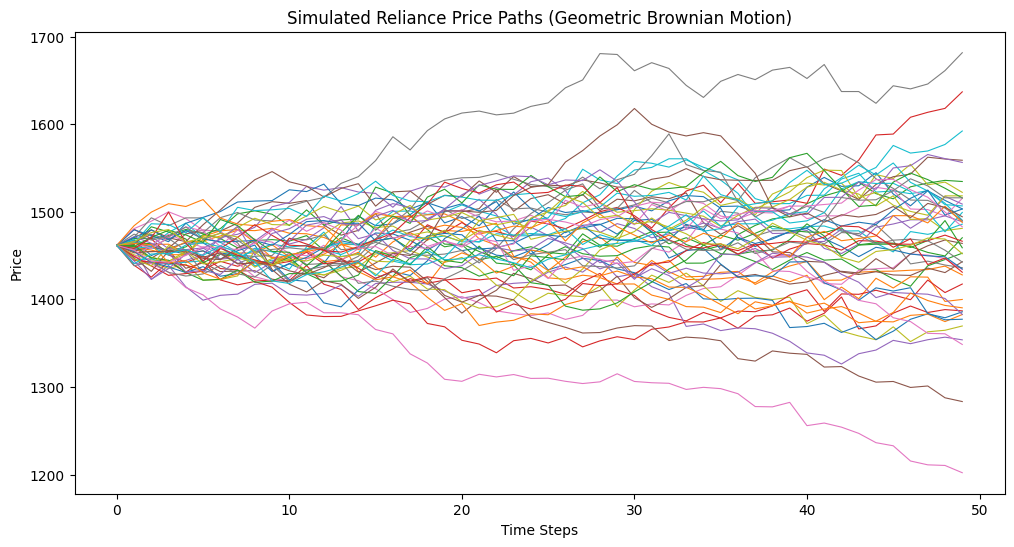

In [6]:
plt.figure(figsize=(12,6))

for i in range(50):   # plot only 50 paths so graph is readable
    plt.plot(paths[:, i], linewidth=0.8)

plt.title("Simulated Reliance Price Paths (Geometric Brownian Motion)")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.show()
